## Preliminary Explorations for Milestone

In [77]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## Import cleaned dataset and observe basic statistics

In [78]:
#Import merged, cleaned data set, print shape and data types and basic stats
#data set comes from Data_Cleanup_v2 in Data Cleanup
Cleaned_data = pd.read_csv("CleanDatav2merge.csv")
print(Cleaned_data.shape)
print(Cleaned_data.dtypes, '\n')
Cleaned_data.describe()

(722, 59)
Unnamed: 0          int64
school             object
sex                object
age               float64
address            object
famsize            object
Pstatus            object
Medu              float64
Fedu              float64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime        float64
studytime         float64
failures          float64
schoolsup          object
famsup             object
paid_port          object
activities         object
nursery            object
higher             object
internet           object
romantic           object
famrel            float64
freetime          float64
goout             float64
Dalc              float64
Walc              float64
health            float64
absences_port     float64
G1_port           float64
G2_port           float64
G3_port           float64
port_only         float64
paid_math          object
absences_math     float64
G1_math           float64
G2

/Users/elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_num,schoolsup_num,famsup_num,activities_num,nursery_num,higher_num,internet_num,romantic_num,paid_port_num,paid_math_num
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,647.000000,395.000000
mean,360.500000,16.818560,2.484765,2.286704,1.566482,1.918283,0.344875,3.915512,3.200831,3.195291,...,0.409972,0.894737,0.397507,0.522161,0.207756,0.113573,0.232687,0.623269,0.939722,0.541772
std,208.567735,1.271272,1.126119,1.090657,0.747913,0.816082,0.730859,0.947913,1.061153,1.173839,...,0.647890,0.307105,0.489722,0.499855,0.405983,0.317512,0.422837,0.484903,0.238186,0.498884
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.250000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,360.500000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,540.750000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
max,721.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


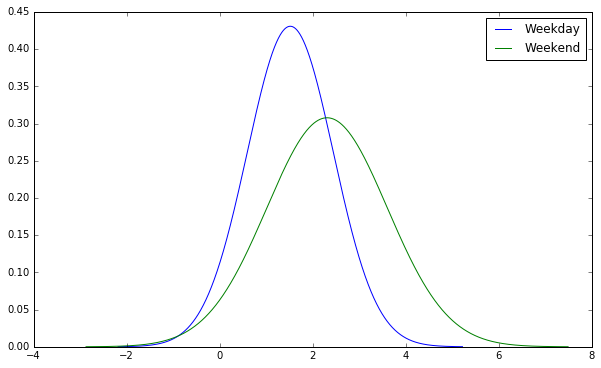

In [67]:
#cumulative distribution of weekday and weekend alcohol consumption from cleaned data set
mean_wd = Cleaned_data['Dalc'].mean()
mean_we = Cleaned_data['Walc'].mean()
std_wd = Cleaned_data['Dalc'].std()
std_we = Cleaned_data['Walc'].std()

x_wd = scipy.arange(mean_wd-4*std_wd,mean_wd+4*std_wd,0.001)
dist_wd = norm.pdf(x_wd, loc=mean_wd, scale=std_wd)
plt.plot(x_wd,dist_wd,label='Weekday')

x_we = scipy.arange(mean_we-4*std_we,mean_we+4*std_we,0.001)
dist_we = norm.pdf(x_we, loc=mean_we, scale=std_we)
plt.plot(x_we,dist_we,label='Weekend')

plt.legend(loc='best')
plt.show()

Weekday and weekend alcohol consumption don't appear to be very different from each other. Which might be expected as a person that drinks more on weekdays is also expected to drink more on weekends.

In [69]:
# Only use columns with numbers involved:
chosen_columns = ['Dalc', 'Fedu', 'G1_math', 'G1_port', 'G2_math','G2_port', 'G3_math', 
                  'G3_port', 'Medu', 'Walc','absences_math', 'absences_port', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math_only', 
                  'port_only', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_port_num', 'paid_math_num']

# chosen_columns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3','Medu', 'Walc','absences', 'age', 
#                   'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
#                   'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
#                   'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
#                   'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

In [70]:
#cleaned data - only numbers
print(Cleaned_data.shape, '\n')
print(Cleaned_data.describe(), '\n')

(722, 40) 

             Dalc        Fedu     G1_math     G1_port     G2_math     G2_port  \
count  722.000000  722.000000  395.000000  647.000000  395.000000  647.000000   
mean     1.520776    2.286704   10.908861   11.409583   10.713924   11.579598   
std      0.925961    1.090657    3.319195    2.742414    3.761505    2.912993   
min      1.000000    0.000000    3.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000         NaN         NaN         NaN         NaN   
50%      1.000000    2.000000         NaN         NaN         NaN         NaN   
75%      2.000000    3.000000         NaN         NaN         NaN         NaN   
max      5.000000    4.000000   19.000000   19.000000   19.000000   19.000000   

          G3_math     G3_port        Medu        Walc      ...        \
count  395.000000  647.000000  722.000000  722.000000      ...         
mean    10.415190   11.918083    2.484765    2.311634      ...         
std      4.581443    3.228323    1.126119 

/Users/elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Number counts for weekend alcohol consumption ratings:
1.0    270
2.0    162
3.0    138
4.0     99
5.0     53
Name: Walc, dtype: int64 

Number counts for weekday alcohol consumption ratings:
1.0    490
2.0    144
3.0     51
5.0     19
4.0     18
Name: Dalc, dtype: int64 



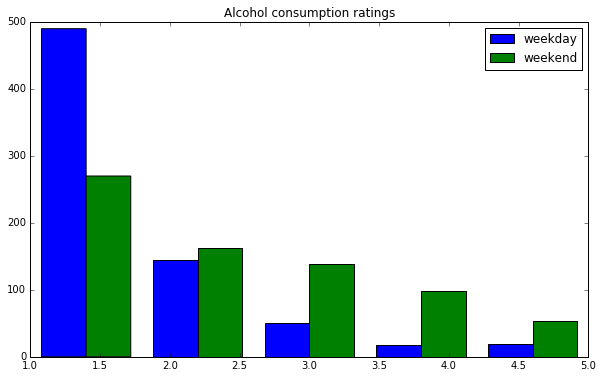

In [71]:
print('Number counts for weekend alcohol consumption ratings:')
print(Cleaned_data['Walc'].value_counts(), '\n')
print('Number counts for weekday alcohol consumption ratings:')
print(Cleaned_data['Dalc'].value_counts(), '\n')

data =[Cleaned_data["Dalc"], Cleaned_data["Walc"]]
n_bins = 5
plt.hist(data, n_bins, label=['weekday','weekend'],histtype='bar');
plt.title('Alcohol consumption ratings')
plt.legend(loc='upper right')
plt.show()

More of the students ranked their alcohol consumption higher on weekends than they did on weekdays. (53 compared to 19 for a rating of 5 or very high). Also, more of the students ranked their alcohol consumption lower on weekdays than they did on weekends. (490 compared to 270 for a rating of 1 or very low). Most students had lower alcohol consumption ratings.

In [72]:
print(Cleaned_data.corr())


                    Dalc      Fedu   G1_math   G1_port   G2_math   G2_port  \
Dalc            1.000000 -0.009340 -0.094159 -0.197854 -0.064120 -0.191678   
Fedu           -0.009340  1.000000  0.190270  0.214980  0.164893  0.223639   
G1_math        -0.094159  0.190270  1.000000  0.592935  0.852118  0.595172   
G1_port        -0.197854  0.214980  0.592935  1.000000  0.543007  0.864891   
G2_math        -0.064120  0.164893  0.852118  0.543007  1.000000  0.565214   
G2_port        -0.191678  0.223639  0.595172  0.864891  0.565214  1.000000   
G3_math        -0.054660  0.152457  0.801468  0.522885  0.904868  0.545453   
G3_port        -0.207317  0.209771  0.543887  0.825750  0.496033  0.918302   
Medu           -0.013662  0.643285  0.205341  0.263298  0.215527  0.264473   
Walc            0.618160  0.024033 -0.126179 -0.156903 -0.084927 -0.165870   
absences_math   0.111908  0.024473 -0.031003 -0.092478 -0.031777 -0.145164   
absences_port   0.173590  0.031168 -0.087606 -0.145995 -0.126362

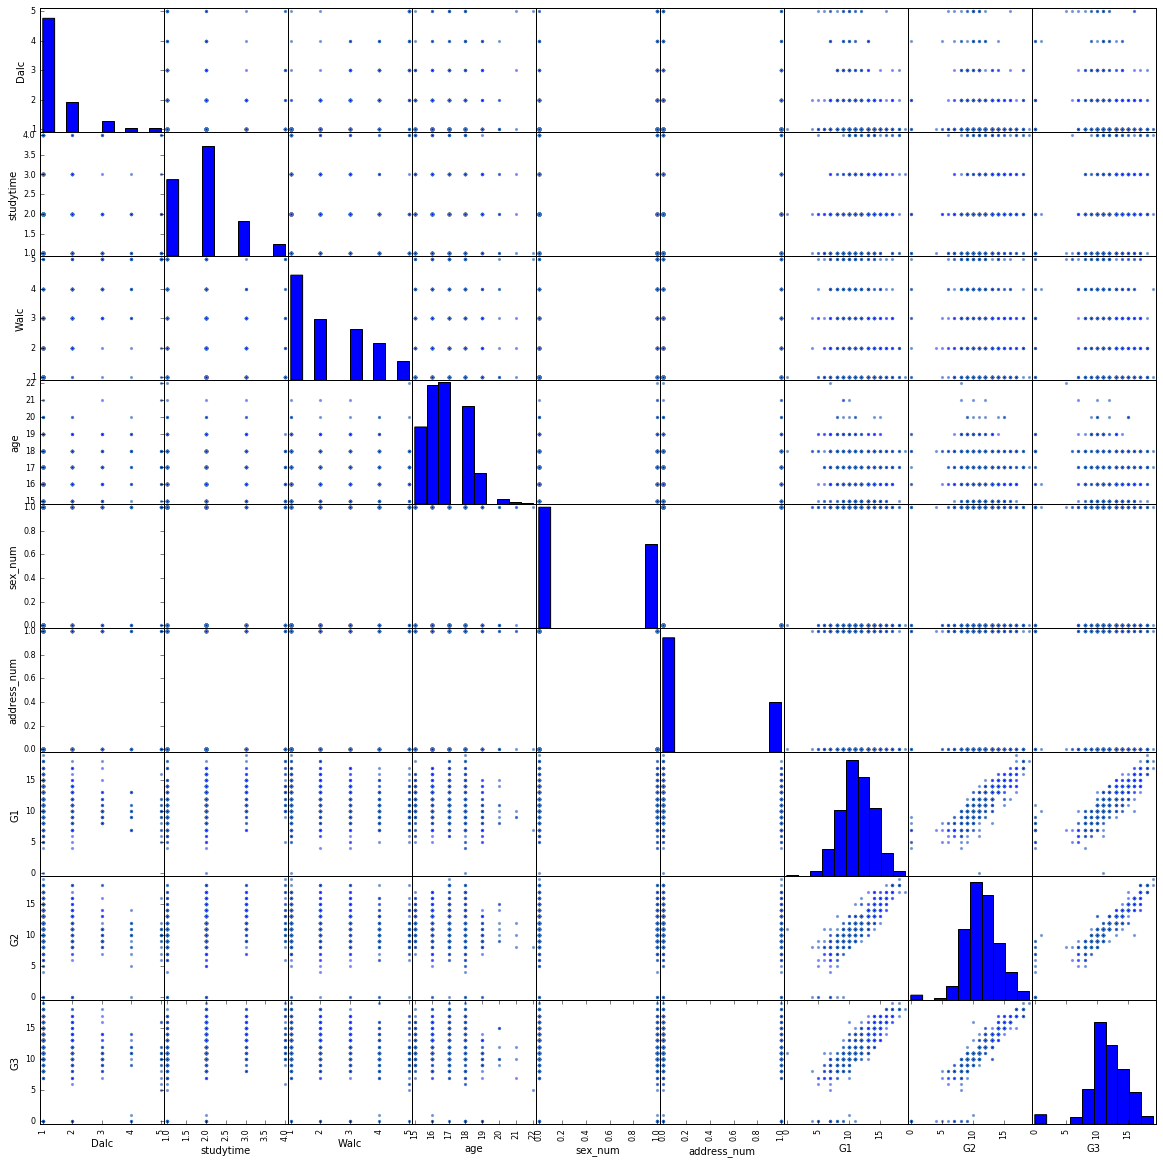

In [44]:
#looking for correlations
# scatter_columns = ['Dalc', 'G1_math', 'G1_port', 'G2_math','G2_port', 'G3_math', 
#                   'G3_port', 'Walc','age', 'sex_num','address_num']

scatter_columns = ['Dalc', 'studytime', 'Walc','age', 'sex_num','address_num','G1','G2','G3']

pd.scatter_matrix(
    Cleaned_data[scatter_columns],
    figsize=(20, 20), diagonal='hist', color="#4682B4"); 

There appear to be no strong correlations between weekday or weekend alcohol consumption ratings with any other variables. The variables that do show stronger correlations with one another are the grades received. A different choice of variables might give different results. There is a correlation of about 62% between weekend and weekday alcohol consumption. This is expected to be high as explained before. There is also a relatively high correlation for both of these variables with a students ranking of how often they go out (~41%). This is also expected as going out more often tends to lead to drinking more often.

## Linear regression

In [65]:
#Some linear regression setup:
model = sm.ols(formula="Walc ~ Dalc + goout + sex_num + studytime", data=Cleaned_data)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walc   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     191.6
Date:                Fri, 18 Nov 2016   Prob (F-statistic):           2.82e-89
Time:                        16:29:59   Log-Likelihood:                -900.07
No. Observations:                 662   AIC:                             1808.
Df Residuals:                     658   BIC:                             1826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1429      0.114      1.257      0.2

This model should be played with more. The R-squared value is almost 50% with the variables we already expect to correlate to weekend alcohol consumption ratings. So this isn't a very predictive model per se. Perhaps including all of the variables would be good. But the grades have NaNs in them which the model doesn't like. 

## Trying to use PCA to reduce dimensions

In [47]:
from sklearn.decomposition import PCA 


In [31]:
#Picking the columns that don't have NaNs in them
noNan = ['Dalc', 'Walc', 'age', 'failures', 'famrel', 'freetime', 'goout', 
         'health', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
        'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
        'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
        'higher_num', 'internet_num', 'romantic_num']

In [75]:
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data.dropna())

In [76]:
pca_model.explained_variance_ratio_

array([  4.32788208e-01,   2.82164457e-01,   7.79513714e-02,
         6.19002007e-02,   2.11716377e-02,   1.45419817e-02,
         1.39267053e-02,   1.21671095e-02,   9.00320096e-03,
         8.06582517e-03,   7.39318867e-03,   6.77551734e-03,
         6.43191167e-03,   6.01450914e-03,   4.87076330e-03,
         4.77673294e-03,   3.85345244e-03,   3.70216386e-03,
         2.89887518e-03,   2.58797665e-03,   2.29102670e-03,
         1.88361602e-03,   1.56049452e-03,   1.44419845e-03,
         1.35301590e-03,   1.21076130e-03,   1.04053946e-03,
         1.01654009e-03,   9.38767238e-04,   7.95897993e-04,
         7.32678756e-04,   5.63465785e-04,   5.33649986e-04,
         4.91780774e-04,   4.12331251e-04,   3.65363472e-04,
         2.78865155e-04,   1.01218331e-04,   2.58316292e-33,
         2.58316292e-33])